In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [3]:
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('seaborn-whitegrid')

In [6]:
df= pd.read_csv('/content/drive/MyDrive/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [7]:
df.shape

(683277, 22)

In [8]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [9]:
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64
(682919, 22)


In [10]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [11]:
col_name=df.columns
for i in col_name:
    print(i,'has :',df[i].nunique(),"Unique values")

Organization Group Code has : 7 Unique values
Job Family Code has : 59 Unique values
Job Code has : 1210 Unique values
Year Type has : 2 Unique values
Year has : 8 Unique values
Organization Group has : 7 Unique values
Department Code has : 60 Unique values
Department has : 109 Unique values
Union Code has : 70 Unique values
Union has : 129 Unique values
Job Family has : 59 Unique values
Job has : 1348 Unique values
Employee Identifier has : 309658 Unique values
Salaries has : 498267 Unique values
Overtime has : 261976 Unique values
Other Salaries has : 307729 Unique values
Total Salary has : 614930 Unique values
Retirement has : 451568 Unique values
Health and Dental has : 209844 Unique values
Other Benefits has : 496051 Unique values
Total Benefits has : 616180 Unique values
Total Compensation has : 658354 Unique values


In [12]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,682919.000000,682919.000000,682919.000000,6.829190e+05,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000
mean,2.977261,2016.364560,492.531570,1.709568e+07,69493.840390,5476.651604,3821.822312,78601.964004,13664.568361,9950.032677,5040.594347,28655.195384,107257.159388
std,1.579440,2.092694,330.911745,1.926007e+07,47766.600651,13112.641274,8388.286266,55745.985286,10109.190457,5732.227856,3787.819609,17866.946463,72282.967638
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.546200e+04,29073.460000,0.000000,0.000000,31756.370000,4679.095000,4784.540000,1872.705000,11748.130000,44540.265000
50%,2.000000,2017.000000,535.000000,5.099500e+04,67911.050000,0.000000,707.470000,74894.560000,13862.820000,12501.250000,4878.880000,32528.910000,107563.090000
75%,4.000000,2018.000000,790.000000,3.737713e+07,100451.055000,4226.340000,4365.000000,112692.195000,20155.985000,14037.160000,7527.095000,40920.955000,154201.665000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


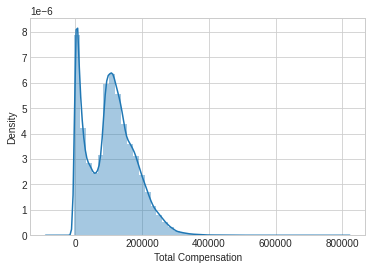

In [13]:
sns.distplot(df['Total Compensation'])
plt.show()

In [14]:
print("Skewness: %f" % df['Total Compensation'].skew())
print("Kurtosis: %f" % df['Total Compensation'].kurt())

Skewness: 0.409119
Kurtosis: 0.020116


In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans=KMeans(n_clusters=3)

In [17]:
df.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [18]:
kmeans.fit(df.drop(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits'],axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
print(kmeans.cluster_centers_)

[[ 23314.77264595]
 [115189.88478557]
 [207078.79836775]]


In [20]:
y=kmeans.labels_
print(y)

[1 1 1 ... 1 2 2]


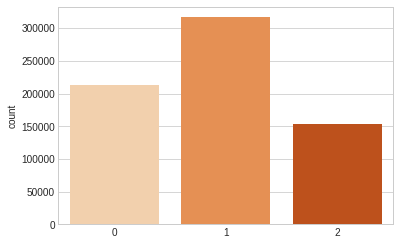

In [21]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

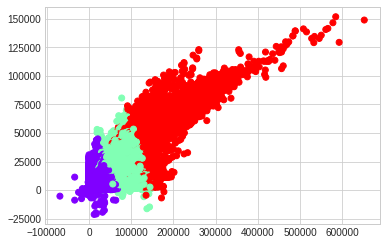

In [22]:
plt.scatter(df['Salaries'],df['Total Benefits'].values, c=kmeans.labels_, cmap="rainbow")
plt.show()

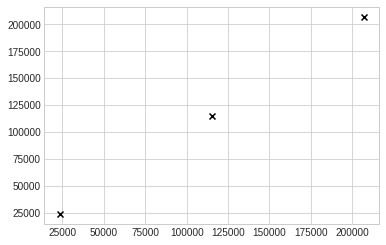

In [23]:
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,0], marker="x", color='k')

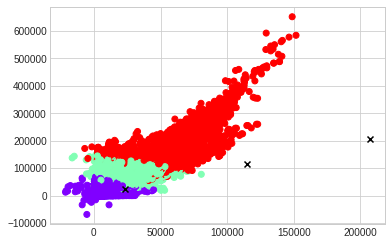

In [24]:
plt.scatter(df['Total Benefits'].values,df['Salaries'].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,0], marker="x", color='k')
plt.show()

In [25]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [26]:
X = df.drop(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits'],axis=1)

In [27]:
wcss= []
for k in range (1,10):
  kmeans= KMeans(n_clusters=k)
  kmeans=kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [28]:
kIdx = 10-1

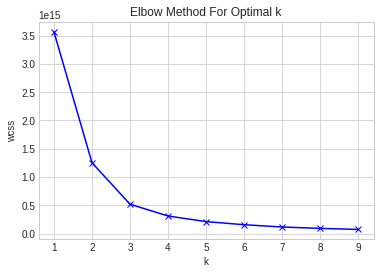

In [29]:
plt.plot(range(1,10), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Elbow Method For Optimal k')
plt.show()